<img src="https://i.esdrop.com/d/7o0dj05m8rnz/JNGCMedl18.png" width="45%">

# 수치예측 - 당뇨병 진척도

---

In [1]:
# Visual Python: Data Analysis > Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Visual Python: Data Analysis > File
df = pd.read_csv('./data/diabetes.csv')
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [3]:
# Visual Python: Data Analysis > Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [4]:
# Visual Python: Data Analysis > Data Info
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-7.284269e-18,2.348549e-17,-2.087320e-16,-4.571507e-17,-9.293722e-18,4.420798e-17,2.135044e-18,2.913707e-17,9.143013e-17,1.431736e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [5]:
# Visual Python: Data Analysis > Data Info
pd.DataFrame({'Null Count': df.isnull().sum(), 'Non-Null Count': df.notnull().sum()})

,Null Count,Non-Null Count
age,0,442
sex,0,442
bmi,0,442
bp,0,442
s1,0,442
s2,0,442
s3,0,442
s4,0,442
s5,0,442
s6,0,442


R squared: 0.4695323569799751
MAE: 46.45684684684684
RMSE: 57.81382931756345


### Regression plot

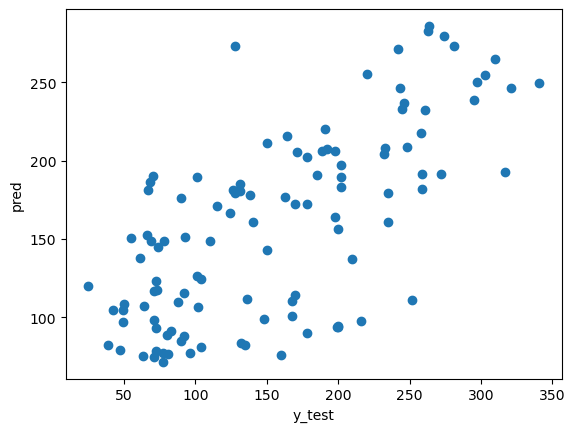

In [6]:
# Visual Python: Machine Learning > Pipeline
# [1] Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']], df['target'])

# [2] Regressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# [3] Fit
model.fit(X_train, y_train)

# [4] Predict
pred = model.predict(X_test)

# [5] Evaluation
from sklearn import metrics
from IPython.display import display, Markdown
# R squared
print('R squared: {}'.format(metrics.r2_score(y_test, pred)))
# MAE(Mean Absolute Error)
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, pred)))
# RMSE(Root Mean Squared Error)
print('RMSE: {}'.format(metrics.mean_squared_error(y_test, pred)**0.5))
# Regression plot
display(Markdown('### Regression plot'))
plt.scatter(y_test, pred)
plt.xlabel('y_test')
plt.ylabel('pred')
plt.show()

---

In [7]:
# End of file